In [1]:
import re
import os, time, datetime
import pandas as pd
import altair as alt
import numpy as np
import pickle

In [2]:
from vega_datasets import data

In [3]:
source = data.cars()
dfsource = pd.DataFrame(source)
dfsource.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


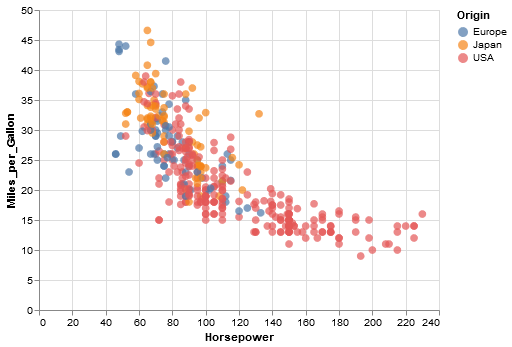

In [4]:
alt.Chart(dfsource).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

In [11]:
from DocCollect import Histories, DictTopN

In [6]:
fn = 'vocab2.pickle'
with open(fn, 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    #pickle.load(vocab1, f, pickle.HIGHEST_PROTOCOL)
    vocab2 = pickle.load(f)

In [9]:
### read history summary
dfSummary = pd.read_excel('summary20.xlsx')
dfSummary.head(20)

,book,grandChar,iDocsM,iDocsCharM,qDocsM,qDocsCharM,commentaryChar,qDocsC,qDocsCharC,DocPercentage
0,BeiQishu,217321,12,11259,14,3234,0,0,0,0.066689
1,Beishi,1194214,111,79844,137,32845,0,0,0,0.094362
2,Chenshu,151600,14,15122,34,9105,0,0,0,0.159809
3,Hanshu,633699,110,115276,271,76805,0,0,0,0.303111
4,HouHanShu,649958,93,84869,262,77377,0,0,0,0.249625
5,Jinshu,790750,178,150417,265,68055,0,0,0,0.276285
6,JiuTangshu,1538613,338,230831,295,64254,0,0,0,0.191786
7,LiangShu,300801,40,45658,80,22898,0,0,0,0.227911
8,Nanqishu,246422,38,31032,101,28595,0,0,0,0.241971
9,Nanshi,718392,54,28864,73,17786,0,0,0,0.064937


In [14]:
## create a look-up table to find the size of a book
BookSize = {}

for idx, row in dfSummary.iterrows():
    book = row['book']
    booksize = row['grandChar'] + row['commentaryChar']
    BookSize[book] = booksize
    
BookSize

{'BeiQishu': 217321,
 'Beishi': 1194214,
 'Chenshu': 151600,
 'Hanshu': 633699,
 'HouHanShu': 649958,
 'Jinshu': 790750,
 'JiuTangshu': 1538613,
 'LiangShu': 300801,
 'Nanqishu': 246422,
 'Nanshi': 718392,
 'Sanguozhi': 801238,
 'Shiji': 320890,
 'Songshi': 2581534,
 'Songshu': 524083,
 'SuiShu': 366717,
 'Weishu': 866751,
 'XinTangshu': 1413549,
 'Zhoushu': 277868}

In [ ]:
VOCAB2_REG = []
VOCAB2_DOC = []

for j, book in Histories:
    VOCAB2_REG.append((book, vocab2['Reg']))

In [15]:
len(vocab2[0]['Doc'])

4022

In [43]:
def compareVocab2Doc(h1, h2):
    
    j1 = Histories.index(h1)
    j2 = Histories.index(h2)
    pd1 = pd.DataFrame(data=DictTopN(vocab2[j1]['Doc'], 200), columns=['word', f'Doc_{h1}'])
    pd2 = pd.DataFrame(data=DictTopN(vocab2[j2]['Doc'], 200), columns=['word', f'Doc_{h2}'])
    pd3  = pd.merge(pd1, pd2, how='outer', on='word')
    pd3[f'pc_{h1}'] = pd3[f'Doc_{h1}'] * 10**5 / BookSize[h1]
    pd3[f'pc_{h2}'] = pd3[f'Doc_{h2}'] * 10**5 / BookSize[h2]
    
    #return pd3
    
    return alt.Chart(pd3[:10]).mark_circle(size=60).encode(
        x=f'pc_{h1}',
        y=f'pc_{h2}',
        color='word',
        tooltip=['word', f'Doc_{h1}', f'Doc_{h2}']
    ).interactive()
    

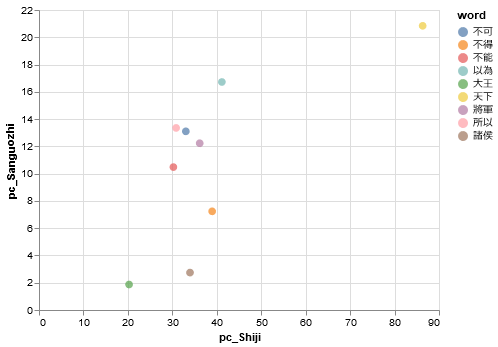

In [44]:
compareVocab2Doc('Shiji', 'Sanguozhi')

In [39]:
compareVocab2Doc('Shiji', 'Sanguozhi')

,word,Doc_Shiji,Doc_Sanguozhi,pc_Shiji,pc_Sanguozhi
0,天下,277.0,167.0,86.322416,20.842746
1,以為,132.0,134.0,41.135592,16.724119
2,不得,125.0,58.0,38.954159,7.238798
3,將軍,116.0,98.0,36.149459,12.231072
4,諸侯,109.0,22.0,33.968026,2.745751
5,不可,106.0,105.0,33.033127,13.104720
6,所以,99.0,107.0,30.851694,13.354334
7,不能,97.0,84.0,30.228427,10.483776
8,匈奴,69.0,NaN,21.502696,NaN
9,大王,65.0,15.0,20.256163,1.872103


In [12]:
DictTopN(vocab2[0]['Doc'], 10)

[('天下', 277),
 ('以為', 132),
 ('不得', 125),
 ('將軍', 116),
 ('諸侯', 109),
 ('不可', 106),
 ('所以', 99),
 ('不能', 97),
 ('匈奴', 69),
 ('大王', 65)]

In [ ]:
vocab2